In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("bitcoin_dataset.csv")

In [3]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
df['btc_market_price'].iloc[1023]

13.6888

In [5]:
import seaborn as sns

In [6]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [7]:
df.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [8]:
from scipy.stats import pearsonr

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


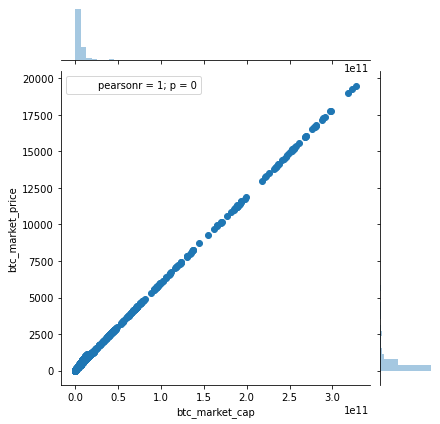

In [9]:
p = sns.jointplot(data=df,x='btc_market_cap',y="btc_market_price",kind='scatter',stat_func=pearsonr)

In [10]:

df = df.dropna()
df = df.reset_index(drop=True)

In [11]:
df.isna().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [53]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [54]:
feature=['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty',
        'btc_hash_rate','btc_cost_per_transaction_percent']
target=['btc_market_price']

In [55]:
x=df[feature]
y=df[target]

In [56]:
y.isna().sum()

btc_market_price    0
dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))



X_train 1869
X_test 922
y_train 1869
y_test 922


In [58]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression()

In [59]:
y_pred=linreg.predict(X_test)


In [61]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,17200.424302
1,663.477493
2,274.142952
3,1015.981257
4,426.056476
...,...
917,126.635985
918,645.760879
919,6323.534041
920,266.990141


In [63]:
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

round(rmse)

22